In [2]:
# Este jupyter se divide en dos partes.
'''
En un principio intenté trabajar con ambas tablas, cruzar datos y crear una nueva tablas donde se identifiquen los vuelos totales y además aquellos que tengas retrasos.
Lo intenté de diversas maneras cambiando el código y finalmente al perder horas en ello, desisté y lo enfoque de otra manera. 
Voy realizar análisis comparativo de ambas tablas. Trabajando de forma independiente pero aplicando los mismos condicionantes para mostrar los datos.
'''

'\nEn un principio intenté trabajar con ambas tablas, cruzar datos y crear una nueva tablas donde se identifiquen los vuelos totales y además aquellos que tengas retrasos.\nLo intenté de diversas maneras cambiando el código y finalmente al perder horas en ello, desisté y lo enfoque de otra manera. \nVoy realizar análisis comparativo de ambas tablas. Trabajando de forma independiente pero aplicando los mismos condicionantes para mostrar los datos.\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

In [4]:
historic = pd.read_csv("./Datos/Tablas/histmatriculas.csv")
historic

,Fecha,Numero vuelo,Aeropuerto Despegue Real,Aeropuerto Aterrizaje Real,Matricula Real,Flota Real
0,2021-01-01,105,PDQ,PIQ,Avión 18,ATR72
1,2021-01-01,106,PIQ,PDQ,Avión 18,ATR72
2,2021-01-01,110,PIQ,PDQ,Avión 25,ATR72
3,2021-01-01,128,CVU,PDQ,Avión 20,ATR72
4,2021-01-01,145,PDQ,PIQ,Avión 25,ATR72
...,...,...,...,...,...,...
199985,2023-09-30,933,PXO,FNC,Avión 40,ATR72
199986,2023-09-30,9400,PDQ,VCE,Avión 32,EM295
199987,2023-09-30,9401,VCE,PDQ,Avión 32,EM295
199988,2023-09-30,9600,PDQ,FLR,Avión 12,EM295


In [5]:
#modificar a datatime
historic["Fecha"] = pd.to_datetime(historic["Fecha"], format = "%Y-%m-%d")

In [6]:
historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199990 entries, 0 to 199989
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       199990 non-null  datetime64[ns]
 1   Numero vuelo                199990 non-null  object        
 2   Aeropuerto Despegue Real    199990 non-null  object        
 3   Aeropuerto Aterrizaje Real  199990 non-null  object        
 4   Matricula Real              199132 non-null  object        
 5   Flota Real                  199990 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [7]:
historic.isna().mean()*100
#El porcentaje de nulos es asumible solo un 0,42%

Fecha                         0.000000
Numero vuelo                  0.000000
Aeropuerto Despegue Real      0.000000
Aeropuerto Aterrizaje Real    0.000000
Matricula Real                0.429021
Flota Real                    0.000000
dtype: float64

In [8]:
eventos_retrasos = pd.read_csv("./Datos/Tablas/eventos_con_retrasos.csv")
eventos_retrasos.isna().mean()*100

ID           0.000000
Occurred     0.000000
At           0.000000
AC           0.000000
Station      7.441213
Headline     0.000000
FlightNo    18.069307
ATA         30.012376
Minutos      0.278465
dtype: float64

In [9]:
eventos_retrasos["Occurred"] = pd.to_datetime(eventos_retrasos["Occurred"], format="%Y-%m-%d")

In [10]:
# Lista de aviones que son EMB295
lista_emb295 = ['Avión 6', 'Avión 12', 'Avión 15', 'Avión 24', 'Avión 32', 'Avión 43', 'Avión 44', 'Avión 45', 'Avión 46', 'Avión 48']

# Función para determinar el tipo de flota
def determinar_flota(avion):
    if avion in lista_emb295:
        return "EMB295"
    else:
        return "ATR72"

# Aplicar la función para crear la nueva columna 'Flota'

eventos_retrasos["Flota"] = eventos_retrasos["AC"].apply(determinar_flota)
eventos_retrasos

,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos,Flota
0,12185,2021-01-02,18:59:00,Avión 1,PIQ,98254/1,NT421,77-00,38.0,ATR72
1,12194,2021-01-03,20:15:00,Avión 2,PDQ,0097630/1,NT312,33-49,15.0,ATR72
2,12200,2021-01-04,06:50:00,Avión 3,PIQ,MAINTENANCE ACTION WITHOUT PILOT REPORT - OPER...,414,25-65,3.0,ATR72
3,12210,2021-01-04,14:13:00,Avión 3,PDQ,0096673/1,NT158,52-42,12.0,ATR72
4,12217,2021-01-05,07:33:00,Avión 4,PIQ,OTHERS / NOT SPECIFIED - OPERATIONAL,NaN,33-00,8.0,ATR72
...,...,...,...,...,...,...,...,...,...,...
6459,69075,2024-07-21,22:05:00,Avión 21,PDQ,PILOTO SOLICITA MANTENIMIENTO POR LATCH DEL CO...,NT349,NaN,14.0,ATR72
6460,69091,2024-07-20,06:20:00,Avión 37,PDQ,SIN ACCION DE MTTO,NT300,NaN,10.0,ATR72
6461,69092,2024-07-20,21:20:00,Avión 8,PDQ,SIN ACCION DE MTTO,NT849,NaN,8.0,ATR72
6462,69094,2024-07-20,07:00:00,Avión 24,PDQ,SIN ACCION DE MTTO,NT6002,NaN,3.0,EMB295


In [11]:
# Transformar los datos para que en ambas columnas sean iguales a la hora de comprar los datos
eventos_retrasos["AC"] = "avion " + eventos_retrasos["AC"].str[6:]
historic["Matricula Real"] = "avion " + historic["Matricula Real"].str[6:]
eventos_retrasos


,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos,Flota
0,12185,2021-01-02,18:59:00,avion 1,PIQ,98254/1,NT421,77-00,38.0,ATR72
1,12194,2021-01-03,20:15:00,avion 2,PDQ,0097630/1,NT312,33-49,15.0,ATR72
2,12200,2021-01-04,06:50:00,avion 3,PIQ,MAINTENANCE ACTION WITHOUT PILOT REPORT - OPER...,414,25-65,3.0,ATR72
3,12210,2021-01-04,14:13:00,avion 3,PDQ,0096673/1,NT158,52-42,12.0,ATR72
4,12217,2021-01-05,07:33:00,avion 4,PIQ,OTHERS / NOT SPECIFIED - OPERATIONAL,NaN,33-00,8.0,ATR72
...,...,...,...,...,...,...,...,...,...,...
6459,69075,2024-07-21,22:05:00,avion 21,PDQ,PILOTO SOLICITA MANTENIMIENTO POR LATCH DEL CO...,NT349,NaN,14.0,ATR72
6460,69091,2024-07-20,06:20:00,avion 37,PDQ,SIN ACCION DE MTTO,NT300,NaN,10.0,ATR72
6461,69092,2024-07-20,21:20:00,avion 8,PDQ,SIN ACCION DE MTTO,NT849,NaN,8.0,ATR72
6462,69094,2024-07-20,07:00:00,avion 24,PDQ,SIN ACCION DE MTTO,NT6002,NaN,3.0,EMB295


In [12]:
# Transformar datos para que coincidan
eventos_retrasos["AC"] = eventos_retrasos["AC"].str.lower().str.strip() if eventos_retrasos["AC"].dtype == "object" else eventos_retrasos["AC"]
historic["Matricula Real"] = historic["Matricula Real"].str.lower().str.strip() if historic["Matricula Real"].dtype == "object" else historic["Matricula Real"]

# Crear diccionario para mapear AC a Flota
flota_mapeo = historic.set_index("Matricula Real")["Flota Real"].to_dict()

# Añadir la columna Flota a eventos_retrasos
eventos_retrasos["Flota"] = eventos_retrasos["AC"].map(flota_mapeo)
eventos_retrasos

,ID,Occurred,At,AC,Station,Headline,FlightNo,ATA,Minutos,Flota
0,12185,2021-01-02,18:59:00,avion 1,PIQ,98254/1,NT421,77-00,38.0,ATR72
1,12194,2021-01-03,20:15:00,avion 2,PDQ,0097630/1,NT312,33-49,15.0,ATR72
2,12200,2021-01-04,06:50:00,avion 3,PIQ,MAINTENANCE ACTION WITHOUT PILOT REPORT - OPER...,414,25-65,3.0,ATR72
3,12210,2021-01-04,14:13:00,avion 3,PDQ,0096673/1,NT158,52-42,12.0,ATR72
4,12217,2021-01-05,07:33:00,avion 4,PIQ,OTHERS / NOT SPECIFIED - OPERATIONAL,NaN,33-00,8.0,ATR72
...,...,...,...,...,...,...,...,...,...,...
6459,69075,2024-07-21,22:05:00,avion 21,PDQ,PILOTO SOLICITA MANTENIMIENTO POR LATCH DEL CO...,NT349,NaN,14.0,ATR72
6460,69091,2024-07-20,06:20:00,avion 37,PDQ,SIN ACCION DE MTTO,NT300,NaN,10.0,ATR72
6461,69092,2024-07-20,21:20:00,avion 8,PDQ,SIN ACCION DE MTTO,NT849,NaN,8.0,ATR72
6462,69094,2024-07-20,07:00:00,avion 24,PDQ,SIN ACCION DE MTTO,NT6002,NaN,3.0,EM295


In [13]:
# Filtrar filas con fecha Occurred mayor a 2023-09-30
eventos_retrasos = eventos_retrasos[eventos_retrasos["Occurred"] <= "2023-09-30"]

In [14]:
# Asegurarnos de que las fechas estén en el mismo formato
eventos_retrasos["Occurred"] = pd.to_datetime(eventos_retrasos["Occurred"])
historic["Fecha"] = pd.to_datetime(historic["Fecha"])

C:\Users\Victor\AppData\Local\Temp\ipykernel_4172\529940843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos_retrasos["Occurred"] = pd.to_datetime(eventos_retrasos["Occurred"])


In [15]:
historic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199990 entries, 0 to 199989
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Fecha                       199990 non-null  datetime64[ns]
 1   Numero vuelo                199990 non-null  object        
 2   Aeropuerto Despegue Real    199990 non-null  object        
 3   Aeropuerto Aterrizaje Real  199990 non-null  object        
 4   Matricula Real              199132 non-null  object        
 5   Flota Real                  199990 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [16]:
eventos_retrasos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 0 to 4978
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        4860 non-null   int64         
 1   Occurred  4860 non-null   datetime64[ns]
 2   At        4860 non-null   object        
 3   AC        4860 non-null   object        
 4   Station   4393 non-null   object        
 5   Headline  4860 non-null   object        
 6   FlightNo  3712 non-null   object        
 7   ATA       3313 non-null   object        
 8   Minutos   4848 non-null   float64       
 9   Flota     4811 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 417.7+ KB


In [17]:
"""
# Crear nueva tabla del historico de vuelo añadiendo los vuelos con retraso

# Crear las tablas en SQLite
conector = sqlite3.connect("base_de_datos_2.db") 
query = conector.cursor()

# Crear las tablas
query.execute('''
    CREATE TABLE IF NOT EXISTS historic (
        Fecha TEXT,
        "Numero vuelo" INTEGER,
        "Aeropuerto Despegue Real" TEXT,
        "Aeropuerto Aterrizaje Real" TEXT,
        "Matricula Real" TEXT,
        "Flota Real" TEXT)''')

query.execute('''
    CREATE TABLE IF NOT EXISTS eventos_retrasos (
        Occurred TEXT,
        AC TEXT,
        Station TEXT,
        Minutos INTEGER)''')

# Paso 3: Eliminar la tabla vuelos_totales si ya existe
query.execute("DROP TABLE IF EXISTS vuelos_totales")
conector.commit()



# Crear la tabla vuelos_totales con las columnas adicionales
query.execute('''
    CREATE TABLE vuelos_totales AS
    SELECT h.*, 
           CASE 
               WHEN e.Minutos IS NOT NULL THEN 'si'
               ELSE 'no'
           END AS Retraso,
           COALESCE(e.Minutos, 0) AS Minutos
    FROM historic h
    LEFT JOIN eventos_retrasos e
    ON h.Fecha = e.Occurred
    AND h."Matricula Real" = e.AC
    AND h."Aeropuerto Despegue Real" = e.Station
''')

conector.commit()

# Verificar el resultado
vuelos_totales = pd.read_sql_query("SELECT * FROM vuelos_totales", conector)

"""

'\n# Crear nueva tabla del historico de vuelo añadiendo los vuelos con retraso\n\n# Crear las tablas en SQLite\nconector = sqlite3.connect("base_de_datos_2.db") \nquery = conector.cursor()\n\n# Crear las tablas\nquery.execute(\'\'\'\n    CREATE TABLE IF NOT EXISTS historic (\n        Fecha TEXT,\n        "Numero vuelo" INTEGER,\n        "Aeropuerto Despegue Real" TEXT,\n        "Aeropuerto Aterrizaje Real" TEXT,\n        "Matricula Real" TEXT,\n        "Flota Real" TEXT)\'\'\')\n\nquery.execute(\'\'\'\n    CREATE TABLE IF NOT EXISTS eventos_retrasos (\n        Occurred TEXT,\n        AC TEXT,\n        Station TEXT,\n        Minutos INTEGER)\'\'\')\n\n# Paso 3: Eliminar la tabla vuelos_totales si ya existe\nquery.execute("DROP TABLE IF EXISTS vuelos_totales")\nconector.commit()\n\n\n\n# Crear la tabla vuelos_totales con las columnas adicionales\nquery.execute(\'\'\'\n    CREATE TABLE vuelos_totales AS\n    SELECT h.*, \n           CASE \n               WHEN e.Minutos IS NOT NULL THEN \'

In [18]:
"""
'''
# Combinar los DataFrames usando una combinación (merge) en lugar de iterar
vuelos_totales = pd.merge(
    historic,
    eventos_retrasos,
    left_on=['Fecha', 'Matricula Real', 'Aeropuerto Despegue Real'],
    right_on=['Occurred', 'AC', 'Station'],
    how='left'
)

# Añadir la columna de Retraso
vuelos_totales['Retraso'] = vuelos_totales['Minutos'].apply(lambda x: 'si' if pd.notnull(x) else 'no')
# Reemplazar los valores NaN en Minutos por 0
vuelos_totales['Minutos'] = vuelos_totales['Minutos'].fillna(0).astype(int)

# Seleccionar las columnas deseadas
vuelos_totales = vuelos_totales[
    ['Fecha', 'Numero vuelo', 'Aeropuerto Despegue Real', 'Aeropuerto Aterrizaje Real', 
     'Matricula Real', 'Flota Real', 'Retraso', 'Minutos']
]

# Guardar el resultado en un nuevo archivo CSV para verificación
vuelos_totales.to_csv("./Datos/Tablas/vuelos_totales.csv", index=False)
'''
"""

'\n\'\'\'\n# Combinar los DataFrames usando una combinación (merge) en lugar de iterar\nvuelos_totales = pd.merge(\n    historic,\n    eventos_retrasos,\n    left_on=[\'Fecha\', \'Matricula Real\', \'Aeropuerto Despegue Real\'],\n    right_on=[\'Occurred\', \'AC\', \'Station\'],\n    how=\'left\'\n)\n\n# Añadir la columna de Retraso\nvuelos_totales[\'Retraso\'] = vuelos_totales[\'Minutos\'].apply(lambda x: \'si\' if pd.notnull(x) else \'no\')\n# Reemplazar los valores NaN en Minutos por 0\nvuelos_totales[\'Minutos\'] = vuelos_totales[\'Minutos\'].fillna(0).astype(int)\n\n# Seleccionar las columnas deseadas\nvuelos_totales = vuelos_totales[\n    [\'Fecha\', \'Numero vuelo\', \'Aeropuerto Despegue Real\', \'Aeropuerto Aterrizaje Real\', \n     \'Matricula Real\', \'Flota Real\', \'Retraso\', \'Minutos\']\n]\n\n# Guardar el resultado en un nuevo archivo CSV para verificación\nvuelos_totales.to_csv("./Datos/Tablas/vuelos_totales.csv", index=False)\n\'\'\'\n'

In [19]:
"""
# Crear una copia del DataFrame historic para añadir las nuevas columnas
vuelos_totales = historic.copy()

# Añadir columnas de 'Retraso' y 'Minutos' inicializadas
vuelos_totales['Retraso'] = 'no'
vuelos_totales['Minutos'] = 0

# Iterar sobre las filas de eventos_retrasos para actualizar vuelos_totales
for index, evento in eventos_retrasos.iterrows():
    # Condiciones para coincidencia
    mask = (
        (vuelos_totales['Fecha'] == evento['Occurred']) &
        (vuelos_totales['Matricula Real'] == evento['AC']) &
        (vuelos_totales['Aeropuerto Despegue Real'] == evento['Station'])
    )
    # Actualizar las filas que cumplen las condiciones
    vuelos_totales.loc[mask, 'Retraso'] = 'si'
    vuelos_totales.loc[mask, 'Minutos'] = evento['Minutos']

# Guardar el resultado en un nuevo archivo CSV para verificación
vuelos_totales.to_csv("./Datos/Tablas/vuelos_totales.csv", index=False)

# Verificar el resultado
print(vuelos_totales.head())
"""

'\n# Crear una copia del DataFrame historic para añadir las nuevas columnas\nvuelos_totales = historic.copy()\n\n# Añadir columnas de \'Retraso\' y \'Minutos\' inicializadas\nvuelos_totales[\'Retraso\'] = \'no\'\nvuelos_totales[\'Minutos\'] = 0\n\n# Iterar sobre las filas de eventos_retrasos para actualizar vuelos_totales\nfor index, evento in eventos_retrasos.iterrows():\n    # Condiciones para coincidencia\n    mask = (\n        (vuelos_totales[\'Fecha\'] == evento[\'Occurred\']) &\n        (vuelos_totales[\'Matricula Real\'] == evento[\'AC\']) &\n        (vuelos_totales[\'Aeropuerto Despegue Real\'] == evento[\'Station\'])\n    )\n    # Actualizar las filas que cumplen las condiciones\n    vuelos_totales.loc[mask, \'Retraso\'] = \'si\'\n    vuelos_totales.loc[mask, \'Minutos\'] = evento[\'Minutos\']\n\n# Guardar el resultado en un nuevo archivo CSV para verificación\nvuelos_totales.to_csv("./Datos/Tablas/vuelos_totales.csv", index=False)\n\n# Verificar el resultado\nprint(vuelos_tot

In [ ]:
#Seguimos con el análisis. Antes vamos a crear columna Flota en eventos_retrasos para tener una mejor visualización en las gráficas

In [23]:
# Analizamos los retrasos por año y el número de vuelos totales por año

# Añadir una columna de año a ambos DF
historic["Año"] = historic["Fecha"].dt.year
eventos_retrasos["Año"] = eventos_retrasos["Occurred"].dt.year

# Número total de vuelos por año
vuelos_por_año = historic.groupby("Año").size().reset_index(name = "Total Vuelos")

# Número de vuelos con retrasos por año
retrasos_por_año = eventos_retrasos.groupby("Año").size().reset_index(name = "Vuelos con Retrasos")


C:\Users\Victor\AppData\Local\Temp\ipykernel_4172\2349702538.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos_retrasos["Año"] = eventos_retrasos["Occurred"].dt.year


In [27]:
# Combinar ambos DataFrames en uno solo
datos_combinados = pd.merge(vuelos_por_año, retrasos_por_año, on = "Año", how = "left") #Usamos merge para fusionar ambos DF, año es la clave y estarán las columnas de vuelos por año y se agregan si coinciden las de retrasos sino NaN
datos_combinados["Vuelos con Retrasos"] = datos_combinados["Vuelos con Retrasos"].fillna(0).astype(int) #Aquellos en los que haya NaN los sustituimos por 0 para evitar discrepancias y aseguramos que sea entero.
datos_combinados["Vuelos sin Retrasos"] = datos_combinados["Total Vuelos"] - datos_combinados["Vuelos con Retrasos"] # Número total de vuelos
datos_combinados["Proporción Retrasos"] = datos_combinados["Vuelos con Retrasos"] / datos_combinados["Total Vuelos"]



# Calcular la proporción de vuelos con retrasos
datos_combinados["Proporción Retrasos"] = datos_combinados["Vuelos con Retrasos"] / datos_combinados["Total Vuelos"]


C:\Users\Victor\AppData\Local\Temp\ipykernel_4172\3634773342.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = datos_combinados, x = "Año", y = "Proporción Retrasos", palette ="viridis")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


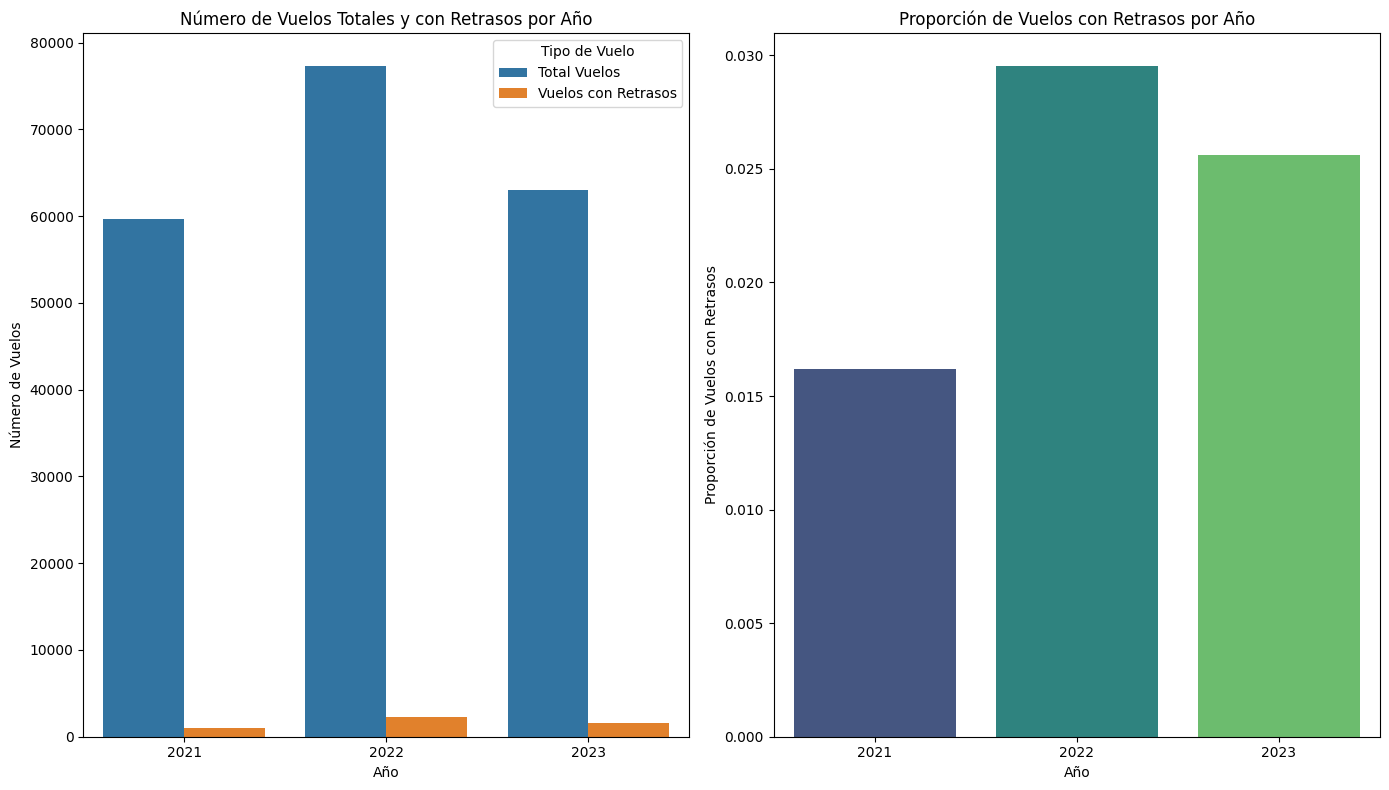

In [32]:
plt.figure(figsize = (14, 8))

# Gráfica de barras del número de vuelos totales y con retrasos por año
plt.subplot(1, 2, 1)
sns.barplot(data = datos_combinados.melt(id_vars = ["Año"], value_vars = ["Total Vuelos", "Vuelos con Retrasos"]), x = "Año", y = "value", hue = "variable")
plt.xlabel("Año")
plt.ylabel("Número de Vuelos")
plt.title("Número de Vuelos Totales y con Retrasos por Año")
plt.legend(title = "Tipo de Vuelo")

# Gráfica de barras de la proporción de vuelos con retrasos por año
plt.subplot(1, 2, 2)
sns.barplot(data = datos_combinados, x = "Año", y = "Proporción Retrasos", palette ="viridis")
plt.xlabel("Año")
plt.ylabel("Proporción de Vuelos con Retrasos")
plt.title("Proporción de Vuelos con Retrasos por Año")
plt.legend().set_visible(False)

plt.tight_layout()
plt.savefig("./Datos/Imagenes/analisis_vuelos_retrasos_barras.png")
plt.show()


In [33]:
# Se puede apreciar una ligera disminución de los vuelso con retrasos en el año 2023, en comparación al aumento del 2021 al 2022
datos_combinados

,Año,Total Vuelos,Vuelos con Retrasos,Vuelos sin Retrasos,Proporción Retrasos
0,2021,59714,966,58748,0.016177
1,2022,77279,2281,74998,0.029516
2,2023,62997,1613,61384,0.025604


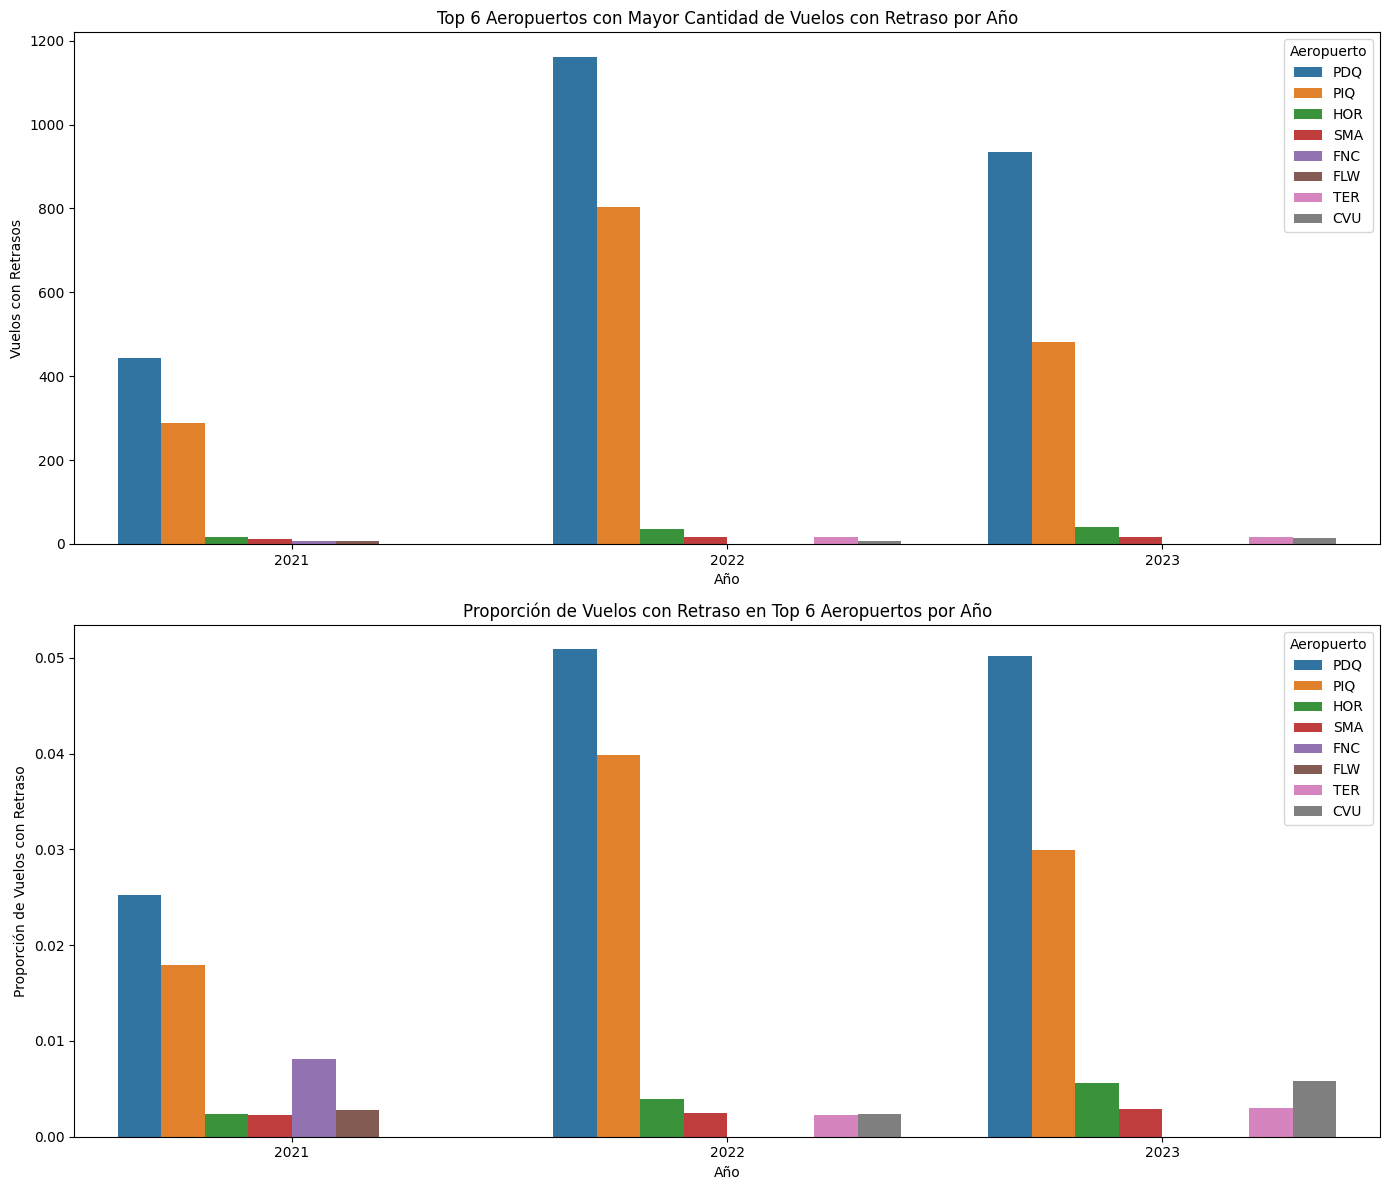

'\nTop 6 Aeropuertos con Mayor Cantidad de Vuelos con Retraso por Año: Esta gráfica de barras muestra los 6 aeropuertos con mayor cantidad de vuelos con retraso por cada año.\n\nProporción de Vuelos con Retraso en Top 6 Aeropuertos por Año: Esta gráfica de barras muestra la proporción de vuelos con retraso en los 6 aeropuertos seleccionados, por cada año.\n'

In [38]:
# Ahora analizaremos el top de 6 aeropuerto cn mayor numero de retraso y el número de vuelos totales que tienen al año

# Calcular las 6 estaciones con mayor cantidad de vuelos con retraso por año
top_stations_retrasos = eventos_retrasos.groupby(["Año", "Station"]).size().reset_index(name="Vuelos con Retrasos")
top_stations_retrasos = top_stations_retrasos.sort_values(by=["Año", "Vuelos con Retrasos"], ascending=[True, False])
top_6_stations_retrasos = top_stations_retrasos.groupby("Año").head(6)

# Calcular el número total de vuelos en las estaciones top 6 por año
total_vuelos_top_stations = historic[historic["Aeropuerto Despegue Real"].isin(top_6_stations_retrasos["Station"])].groupby(["Año", "Aeropuerto Despegue Real"]).size().reset_index(name="Total Vuelos")

# Combinar los datos para obtener la proporción de retrasos
combined_data = pd.merge(top_6_stations_retrasos, total_vuelos_top_stations, left_on=["Año", "Station"], right_on=["Año", "Aeropuerto Despegue Real"], how="left")
combined_data["Proporción Retrasos"] = combined_data["Vuelos con Retrasos"] / combined_data["Total Vuelos"]

# Crear las gráficas
plt.figure(figsize=(14, 12))

# Gráfica de las 6 estaciones con mayor cantidad de vuelos con retraso por año
plt.subplot(2, 1, 1)
sns.barplot(data=top_6_stations_retrasos, x="Año", y="Vuelos con Retrasos", hue="Station")
plt.xlabel("Año")
plt.ylabel("Vuelos con Retrasos")
plt.title("Top 6 Aeropuertos con Mayor Cantidad de Vuelos con Retraso por Año")
plt.legend(title="Aeropuerto")

# Gráfica de la proporción de vuelos con retraso en las top 6 estaciones por año
plt.subplot(2, 1, 2)
sns.barplot(data=combined_data, x="Año", y="Proporción Retrasos", hue="Station")
plt.xlabel("Año")
plt.ylabel("Proporción de Vuelos con Retraso")
plt.title("Proporción de Vuelos con Retraso en Top 6 Aeropuertos por Año")
plt.legend(title="Aeropuerto")

plt.tight_layout()
plt.savefig("./Datos/Imagenes/analisis_top6_estaciones_retrasos.png")
plt.show()

# Mostrar los datos combinados para verificación
combined_data.head()

'''
Top 6 Aeropuertos con Mayor Cantidad de Vuelos con Retraso por Año: Esta gráfica de barras muestra los 6 aeropuertos con mayor cantidad de vuelos con retraso por cada año.

Proporción de Vuelos con Retraso en Top 6 Aeropuertos por Año: Esta gráfica de barras muestra la proporción de vuelos con retraso en los 6 aeropuertos seleccionados, por cada año.
'''

In [39]:
# Análisis comentado del gráfico
'''
1. Top 6 Aeropuertos con Mayor Cantidad de Vuelos con Retraso por Año
Descripción:
La primera gráfica de barras muestra los 6 aeropuertos con la mayor cantidad de vuelos con retraso para cada año. 
Cada aeropuerto está representado con un color distinto, la altura es el numero de retrasos por año.

Análisis:

En 2021, los aeropuertos PDQ y PIQ destacan con un número significativo de vuelos con retraso (444 y 289, respectivamente). Hay que destacar que son las bases principales de reparaciones.
En 2022, el aeropuerto PDQ sigue liderando en retrasos con un aumento notable (962 vuelos con retraso), seguido por PIQ con 596 vuelos.
En 2023, aunque los números generales de retrasos han disminuido, PDQ y PIQ siguen siendo los aeropuertos más afectados, con PDQ registrando 812 vuelos con retraso.

Conclusiones:
Los aeropuertos PDQ y PIQ tienen la mayor cantidad de vuelos con retraso año tras año.

2. Proporción de Vuelos con Retraso en Top 6 Aeropuertos por Año
Descripción:
Esta gráfica de barras muestra la proporción de vuelos con retraso respecto al total de vuelos para los 6 aeropuertos con más retrasos por cada año. Las barras representan la proporción de vuelos con retraso.

Análisis:

En 2021, el aeropuerto PDQ tiene una proporción de retrasos de aproximadamente 2.5%, mientras que PIQ tiene cerca del 1.8%.
En 2022, las proporciones aumentan, con PDQ alcanzando un 4.9% y PIQ un 3.3%.
En 2023, aunque las proporciones disminuyen levemente, PDQ sigue teniendo una proporción alta de vuelos con retraso (4.6%).
Conclusiones:

La proporción de retrasos en los aeropuertos PDQ y PIQ es alta, indicando un problema persistente en estos aeropuertos.

CONCLUSIONES Y RECOMENDACIONES FINALES

Investigación Detallada en Aeropuertos Clave:

Realizar un análisis más profundo en PDQ y PIQ para identificar las causas principales de los retrasos. Esto puede incluir factores como congestión del tráfico aéreo, 
condiciones climáticas, y eficiencia en el manejo de tierra.

Proponer e implementar soluciones específicas para reducir los retrasos, como mejoras en la infraestructura, optimización de horarios de vuelos, y mejor gestión de recursos en tierra.
Monitoreo Continuo:

Establecer un sistema de monitoreo continuo para evaluar el impacto de las medidas implementadas y ajustar estrategias según sea necesario.
Comunicación y Colaboración:

Colaborar con las autoridades aeroportuarias, las aerolíneas y otros stakeholders relevantes para asegurar una implementación efectiva de las soluciones y mejorar la experiencia de los pasajeros.
Conclusión
Este análisis EDA ha revelado patrones claros de retrasos en vuelos en aeropuertos específicos. Los aeropuertos PDQ y PIQ destacan por su alta incidencia y proporción de retrasos, 
lo que requiere atención inmediata y medidas correctivas. Mediante un enfoque proactivo y colaborativo, es posible reducir los retrasos y mejorar la eficiencia operativa en estos aeropuertos clave.
'''

'\n1. Top 6 Aeropuertos con Mayor Cantidad de Vuelos con Retraso por Año\nDescripción:\nLa primera gráfica de barras muestra los 6 aeropuertos con la mayor cantidad de vuelos con retraso para cada año. \nCada aeropuerto está representado con un color distinto, la altura es el numero de retrasos por año.\n\nAnálisis:\n\nEn 2021, los aeropuertos PDQ y PIQ destacan con un número significativo de vuelos con retraso (444 y 289, respectivamente). Hay que destacar que son las bases principales de reparaciones.\nEn 2022, el aeropuerto PDQ sigue liderando en retrasos con un aumento notable (962 vuelos con retraso), seguido por PIQ con 596 vuelos.\nEn 2023, aunque los números generales de retrasos han disminuido, PDQ y PIQ siguen siendo los aeropuertos más afectados, con PDQ registrando 812 vuelos con retraso.\n\nConclusiones:\nLos aeropuertos PDQ y PIQ tienen la mayor cantidad de vuelos con retraso año tras año.\n\n2. Proporción de Vuelos con Retraso en Top 6 Aeropuertos por Año\nDescripción:\n